## Lecture VIII: Data Visualization

1. [Exercises](#exercises)


2. [Basics of `matplotlib` and `seaborn`](#mpl_basics)


3. [Code to generate figures from the lecture](#lecture_code)


*LaTeX* code to generate tables from the slides is available in `./tex_examples/`

<a id='exercises'></a>
### 1. Exercises

We have some data for you, but you are free to use any dataset you are comfortable with.

File `../data/return_data_long_format.csv` contains returns on several stocks along with their sector classification, and file `../data/return_data.csv` contains the data in a wide format.
    
    
1. Go to [Adobe Color Wheel](https://color.adobe.com/create/color-wheel) and create your own palette


2. Plot cumulative returns (or any meaningful line plot)


3. Make a scatter plot of one series versus another one, plot a regression line as well


4. Compute descriptive statistics
      
      
5. Put your results into a well-organized table, feel free to modify `./tex_examples/tables.tex`

<a id='mpl_basics'></a>
### 2. Basics of `matplotlib` and `seaborn`

`matplotlib` is like *LaTeX* it can do anything but at times it is extremely painful to work with. `seaborn` on the other hand provides a higher level functionality with many ready-to-deploy solutions. If `matplotlib` makes hard things possible, `seaborn` makes a well defined set of hard things easy.

Let's get some data first:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe of returns: dates vs assets
ret_data = pd.read_csv("../data/return_data.csv", parse_dates=True, index_col=0)

# Stacked dataframe with additional information on sectors
ret_data_long = pd.read_csv("../data/return_data_long_format.csv", parse_dates=True, index_col=None)


ret_data.head()

,AAPL,CVX,DAL,GM,GS,JPM,LUV,MSFT,SPY,TSLA,XOM
Date,,,,,,,,,,,
2010-11-19,-0.005512,0.001432,-0.000726,0.002047,-0.004063,-0.006303,0.000738,-0.005805,0.002751,0.036802,0.003271
2010-11-22,0.021615,-0.005838,0.000000,-0.005254,-0.033720,-0.022837,0.005158,0.001557,-0.000831,0.077767,-0.004962
2010-11-23,-0.014775,-0.020371,-0.003634,-0.024354,-0.020304,-0.022851,-0.016129,-0.023707,-0.014477,0.035030,-0.017239
2010-11-24,0.019661,0.014434,0.045222,0.006918,0.015718,0.014084,0.024590,0.009952,0.014774,0.026034,0.013047
2010-11-26,0.000636,-0.010611,-0.006979,0.009558,-0.012729,-0.017295,-0.016000,-0.004730,-0.011647,-0.004229,-0.009302


In [2]:
ret_data_long.head()

,date,asset,stock_ret,SPY,sector
0,2010-11-19,AAPL,-0.005512,0.002751,Tech
1,2010-11-19,CVX,0.001432,0.002751,Oil
2,2010-11-19,DAL,-0.000726,0.002751,Airlines
3,2010-11-19,GM,0.002047,0.002751,Auto
4,2010-11-19,GS,-0.004063,0.002751,Banks


`pandas` has integrated plotting functionality which is extremely useful for data exploration.

For example, let's plot cumulative returns on Apple and SP500 ETF for the past couple of years:

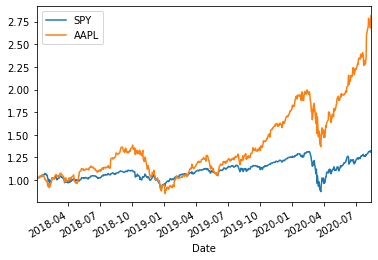

In [3]:
(1+ret_data[["SPY", "AAPL"]])["2018":].cumprod().plot()

Alright, we see that Apple outperformed the market, but the plot is tiny, and the date labels are off...

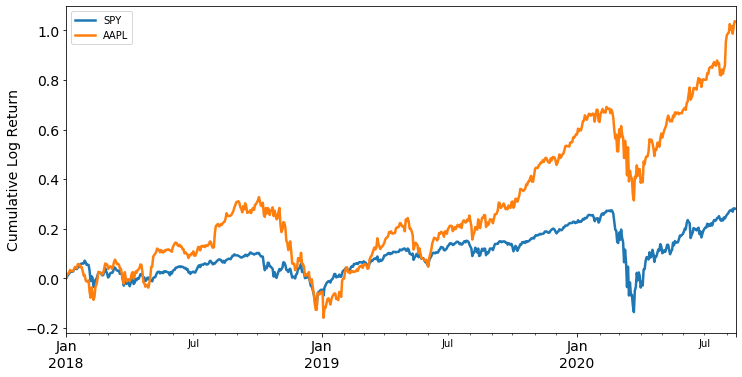

In [4]:
# 'fig' object is an overall canvas, and 
# 'ax' object is a particlular subplot + a collection of tools: paints, brushes, etc.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# We can exploit custom tick parameters of pandas plotting by reseampling the 
# data to a frequency recognized by pandas

# Resample to business day frequency, 
# fill gaps with zeros: the frequency doesn't correspond 1-for-1 to that of the US stock market
data_to_plot = ret_data.resample("B").last().fillna(0)  

# Plot the data, on the log scale, increase line width
np.log((1+data_to_plot[["SPY", "AAPL"]]))["2018":].cumsum().plot(ax=ax, lw=2.5)

# Increase fontsize of the axis and tick labels
ax.set_xlabel("", fontsize=12, visible=False)  # it's apparrent that these are dates, remove the label
ax.set_ylabel("Cumulative Log Return", fontsize=14, visible=True)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)

What if we want several subplots?

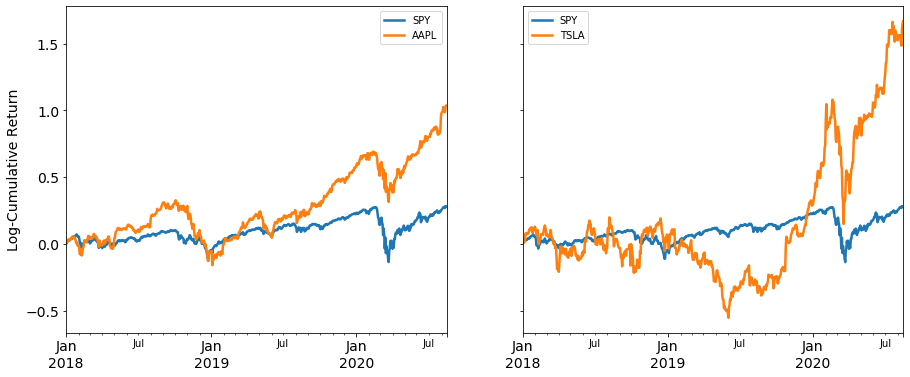

In [5]:
# Now 'axes' in an array of 'Axes' objects - one for each subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

# Plot data on both subplots
np.log((1+data_to_plot[["SPY", "AAPL"]]))["2018":].cumsum().plot(ax=axes[0], lw=2.5)
np.log((1+data_to_plot[["SPY", "TSLA"]]))["2018":].cumsum().plot(ax=axes[1], lw=2.5)

# Increase fontsize of the axis and tick labels: now looping over subplots
for ax in axes:
    ax.set_xlabel("", fontsize=12, visible=False)  # it's apparrent that these are dates, remove the label
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    
    # Place y-axis label only on the first subplot
    if ax == axes[0]:
        ax.set_ylabel("Log-Cumulative Return", fontsize=14, visible=True)

Now to `seaborn`, let's plot the joint density of a couple of our series, a truly Herculean task in `matplotlib`.

Text(0.5, 1, 'JPM Density')

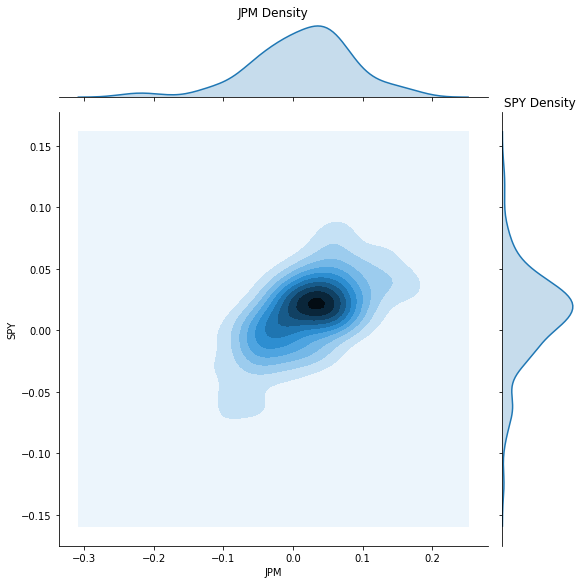

In [6]:
# Resample to monthly
ret_m = ret_data.resample("M").apply(lambda x: (1+x).prod() -1)

# Seaborn 'Grid' object encapsulating both 'fig', and 'ax'
g = sns.jointplot(x=ret_m["JPM"], y=ret_m["SPY"], kind="kde", height=8)

# For example set titles to marginal densities by accessing their 'ax' objects
g.ax_marg_y.set_title("SPY Density", fontsize=12)
g.ax_marg_x.set_title("JPM Density", fontsize=12)

# Saving the figure is similar to matplotlib
# g.savefig("./figures/joint_density.png")

We even can construct barplots with confidence intervals:

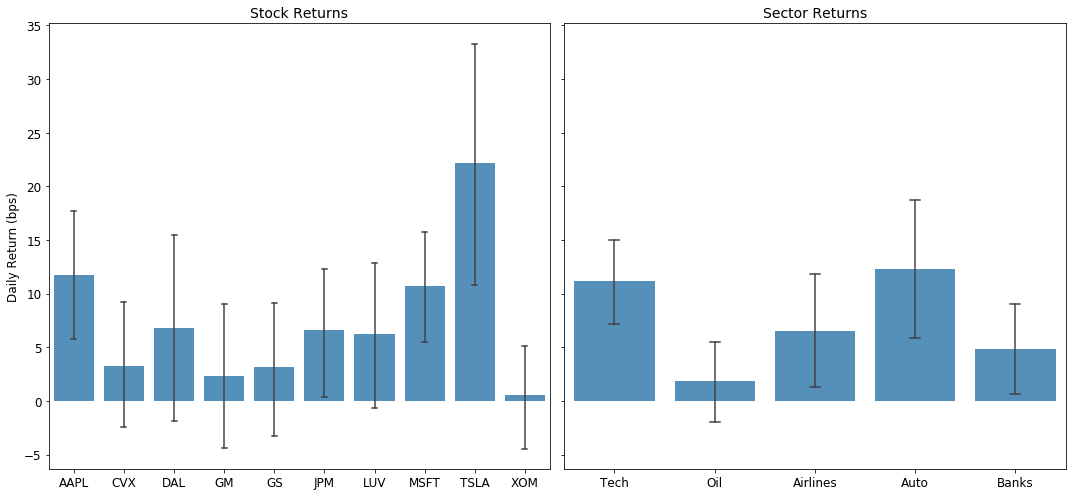

In [7]:
# Plot daily returns in basis points
data_to_plot = ret_data_long.copy()
data_to_plot["stock_ret"] = data_to_plot["stock_ret"] * 1e4

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)

# Individual stocks go to the left...
sns.barplot(x="asset", y="stock_ret", data=data_to_plot,    # what to plot: data
            color="#1f77b4", saturation=0.85, alpha=0.8,    # how to plot: color 
            ci=90, n_boot=1000, errwidth=1.5, capsize=0.1,  # how to plot: error bars
            ax=axes[0]                                      # where to plot
            )

# And sectors go to the right
sns.barplot(x="sector", y="stock_ret", data=data_to_plot, 
            color="#1f77b4", saturation=0.85, alpha=0.8,  
            ci=90, n_boot=1000, errwidth=1.5, capsize=0.1,
            ax=axes[1]                                      
            )

# Assign subplot titles
axes[0].set_title("Stock Returns", fontsize=14)
axes[1].set_title("Sector Returns", fontsize=14)

# Remove axis labels and increase tick label fontsize
for ax in axes:
    ax.set_xlabel("", fontsize=12, visible=False)  
    ax.set_ylabel("", fontsize=12, visible=False)  
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    
# Finally set the y-axis label on the left subplot
axes[0].set_ylabel("Daily Return (bps)", fontsize=12, visible=True)
    
fig.tight_layout()
# fig.savefig("./figures/barplots.png")

Finally let's checkout the color management

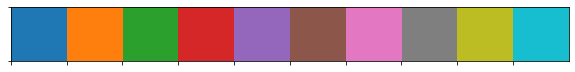

In [8]:
# Get and plot current palette
current_palette = sns.color_palette()
sns.palplot(current_palette)

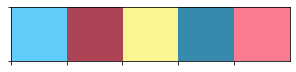

In [9]:
# Create a custom palette
custom_palette = ["#61CCFA", "#AD4455", "#FAF593", "#368AAD", "#FA7A90"]
sns.palplot(custom_palette)

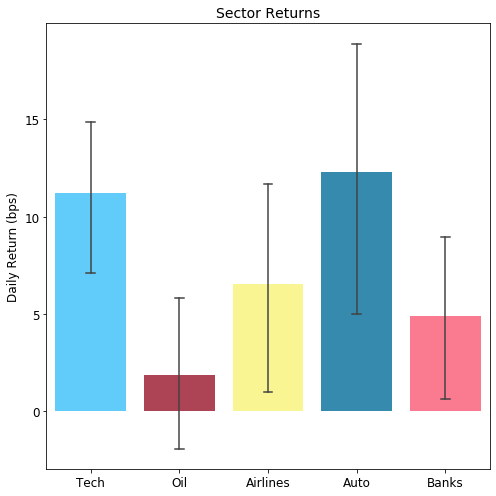

In [10]:
# Replot the right subplot of the previous figure with the custom palette
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

# Individual stocks go to the left...
sns.barplot(x="sector", y="stock_ret", data=data_to_plot,    # what to plot: data
            palette=custom_palette, saturation=1, alpha=1,    # how to plot: color 
            ci=90, n_boot=1000, errwidth=1.5, capsize=0.1,  # how to plot: error bars
            ax=ax                                      # where to plot
            )

ax.set_title("Sector Returns", fontsize=14)
ax.set_ylabel("Daily Return (bps)", fontsize=12, visible=True)
ax.set_xlabel("", fontsize=12, visible=False)  
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
    
fig.tight_layout()
# fig.savefig("./figures/barplots.png")

<a id='lecture_code'></a>
### 3. Code to generate plots from the lecture

### Bar Charts

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [12]:
# Generate cheese data
growth_rates = pd.Series(data=1.083, index=range(2018, 2027))
growth_rates.loc[2018] = 1

data = 2.48 * growth_rates.cumprod()
data = data.reset_index()
data.columns = ["Year", "Market Size (USD bn)"]
data.head()

,Year,Market Size (USD bn)
0,2018,2.480000
1,2019,2.685840
2,2020,2.908765
3,2021,3.150192
4,2022,3.411658


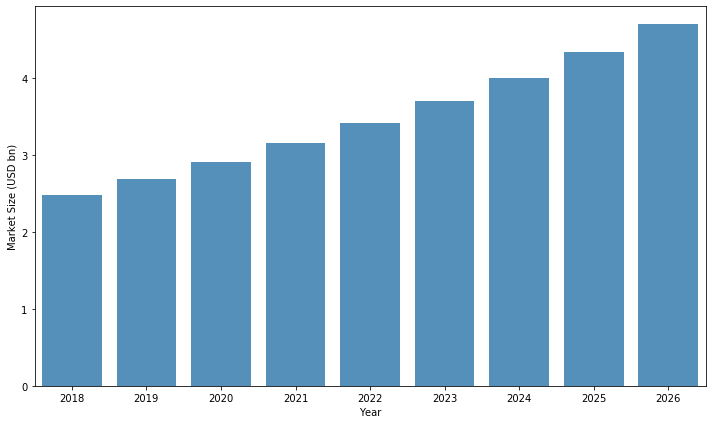

In [13]:
# Simple barchart
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x="Year", y="Market Size (USD bn)", data=data, color="#1f77b4",
            saturation=0.85, alpha=0.8, ax=ax)
fig.tight_layout()
# fig.savefig("./figures/barchart1.png")

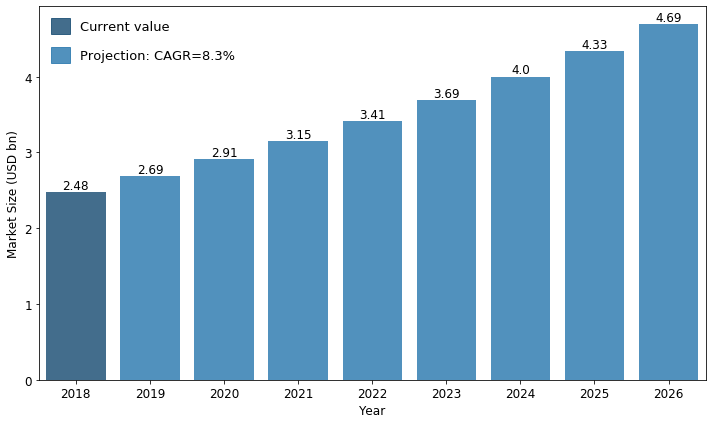

In [14]:
# A better version

# Define colors
dark_blue = "#0F4A75"
light_blue =  "#1f77b4"

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Dark blue for the first bar, light blue for the rest
palette = [dark_blue] + [light_blue] * (len(data)-1)  

# Plot
sns.barplot(x="Year", y="Market Size (USD bn)", 
            data=data, palette=palette, 
            saturation=0.9, alpha=0.8, ax=ax)

# Custom legend: get current face colors from bar patches because 
# we used saturation and alpha options, which change tone 
dark_patch = mpatches.Patch(color=ax.patches[0].get_facecolor(),  
                            label="Current value")
light_patch = mpatches.Patch(color=ax.patches[1].get_facecolor(),
                             label="Projection: CAGR=8.3%")
ax.legend(handles=[dark_patch, light_patch], fontsize=13, frameon=False,
         labelspacing=1, handlelength=1.5, handleheight=1.5)

# Axes formatting
ax.set_xlabel("Year", fontsize=12, visible=True)
ax.set_ylabel("Market Size (USD bn)", fontsize=12, visible=True)
ax.yaxis.set_tick_params(labelsize=12, rotation=0)
ax.xaxis.set_tick_params(labelsize=12, rotation=0)

# Annotate bars with values
for i, p in enumerate(ax.patches):
    _x = p.get_x() + p.get_width() / 2      # set the label at the middle of each bar 
    _y = p.get_y() + p.get_height() + 0.04  # add a small distance between the number and the bar
    ax.text(_x, _y, data["Market Size (USD bn)"].iloc[i].round(2), ha="center", fontsize=12) 
        
fig.tight_layout()    
# fig.savefig("./figures/barchart2.png")


### Anscombe's Quartet

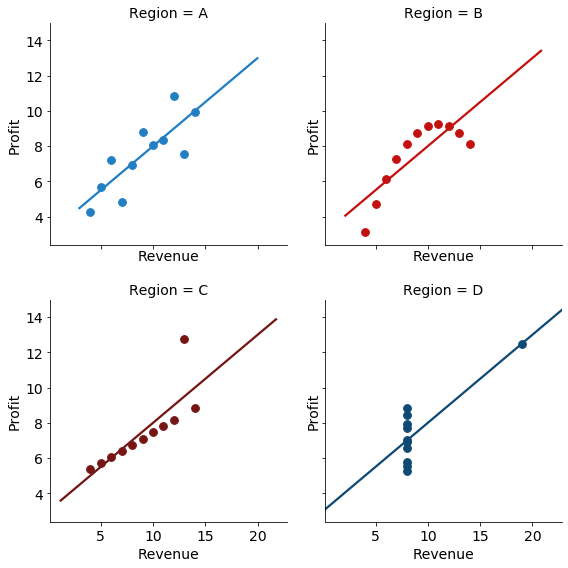

In [15]:
import seaborn as sns

# Load the data
df = sns.load_dataset("anscombe")

# Rename the columns to be consistent with the slides
df.rename(columns={"dataset": "Region", "x": "Revenue", "y": "Profit"},
          inplace=True)
df["Region"] = df["Region"].map({"I": "A", "II": "B", "III": "C",
                                 "IV": "D"})

# Choose colors
palette = ["#217FC2", "#C2110E", "#751614", "#0F4A75"]

# Plot
fig = sns.lmplot(x="Revenue", y="Profit", col="Region", hue="Region",
                 data=df, col_wrap=2, ci=None, palette=palette, height=4,
                 scatter_kws={"s": 60, "alpha": 1})

# Increase font size for axis and tick labels
for x in fig.axes:
    x.set_title(x.get_title(), fontsize=14)
    x.set_xlabel("Revenue", fontsize=14, visible=True)
    x.set_ylabel("Profit", fontsize=14, visible=True)
    x.yaxis.set_tick_params(labelsize=14, rotation=0)
    x.xaxis.set_tick_params(labelsize=14, rotation=0)

fig.fig.tight_layout(w_pad=2, h_pad=2)
# fig.savefig("./figures/anscombe.png")

### Reverse Return Index

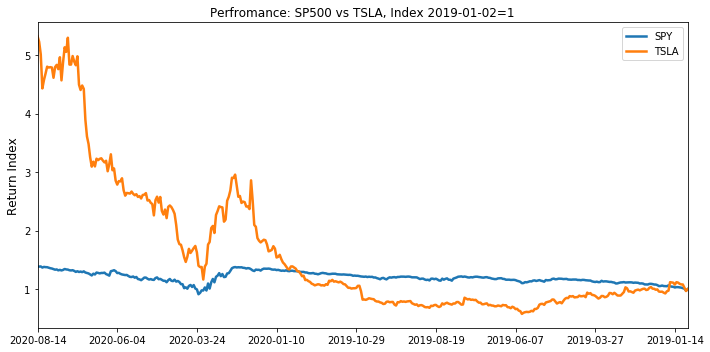

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe of returns: dates vs assets
ret_data = pd.read_csv("../data/return_data.csv", parse_dates=True, index_col=0)

# Construct return indices from 2019 onwards
ret_idx = (1+ret_data["2019":]).cumprod()

# Normalize to 1 at the beginning of the sample
ret_idx = ret_idx/ret_idx.iloc[0]

# Construct reverse index series
reverse_idx = ret_idx.iloc[::-1, :]
reverse_idx.index = [x.strftime("%Y-%m-%d") for x in reverse_idx.index]

# Plot reverse
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
reverse_idx[["SPY", "TSLA"]].plot(ax=ax, lw=2.5)

# Increase fontsize of the axis and tick labels
ax.set_xlabel("", fontsize=12, visible=False)  # it's apparrent that these are dates, remove the label
ax.set_ylabel("Return Index", fontsize=12, visible=True)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_title("Perfromance: SP500 vs TSLA, Index 2019-01-02=1", fontsize=12)

fig.tight_layout()
# fig.savefig("./figures/linechart1.png")